In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

1. Загрузка и обзор данных

In [3]:
display(train.shape, train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

(10000, 20)

None

In [4]:
display(test.shape, test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

(5000, 19)

None

In [5]:
train_num_features = train.select_dtypes(include=['float64', 'int64'])
train_num_features.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Здесь сразу видно, что у нас есть проблемы в LifeSquare, KitchenSquare, HouseYear

In [6]:
test_num_features = test.select_dtypes(include=['float64', 'int64'])
test_num_features.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


Здесь таких проблем на вскидку нет. Обработаем в train HouseYear

In [7]:
train['HouseYear'].value_counts()

1977        2652
2017         308
2016         305
2015         299
2014         210
            ... 
1947           1
1916           1
1910           1
1928           1
20052011       1
Name: HouseYear, Length: 97, dtype: int64

In [8]:
train.loc[train['HouseYear'] == 20052011, 'HouseYear'] = 2005

Проверим, что у нас в test по HouseYear

In [9]:
test['HouseYear'].value_counts()

1977    1298
2016     172
2015     159
2017     141
1970     111
        ... 
1910       1
1950       1
1934       1
1909       1
1908       1
Name: HouseYear, Length: 97, dtype: int64

Обработаем выбросы по комнатам

In [10]:
display(train['Rooms'].value_counts(), test['Rooms'].value_counts())

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

2.0     2030
1.0     1769
3.0     1099
4.0       90
5.0        7
0.0        2
6.0        2
17.0       1
Name: Rooms, dtype: int64

In [11]:
train.loc[train['Rooms'].isin([0, 10, 19, 17]), 'Rooms'] = train['Rooms'].median()
test.loc[test['Rooms'].isin([0, 10, 19, 17]), 'Rooms'] = test['Rooms'].median()

Посмотрим, что у нас с площадью. Меня смущают жилье, где общая площадь меньше суммы площадей.

In [12]:
train[(train['LifeSquare'] + train['KitchenSquare'])> train['Square']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
28,8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,NaN,0,0,B,95338.198549
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
48,7596,23,1.0,47.080100,46.807989,12.0,3,9.0,1977,0.014073,B,B,2,475,0,NaN,0,0,B,96029.167877
52,2301,1,2.0,61.400054,65.224603,0.0,17,22.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,199215.452229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9897,4497,1,1.0,38.330353,38.010046,8.0,7,17.0,1991,0.025609,B,B,33,5261,0,240.0,3,1,B,97464.327338
9902,14001,73,1.0,44.098768,44.267551,1.0,7,24.0,2014,0.042032,B,B,37,6856,84,1940.0,2,5,B,381937.404161
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,NaN,1,4,B,528560.506016
9918,14904,34,4.0,104.049130,99.788387,10.0,8,25.0,2018,0.069753,B,B,53,13670,4,NaN,1,11,B,411971.106869


А еще меня смущает кухня = 0

In [13]:
train[train['KitchenSquare'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
23,6641,54,3.0,118.907612,NaN,0.0,2,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
26,4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936
39,9371,23,2.0,60.503248,NaN,0.0,16,0.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,229778.057902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9948,8438,1,2.0,66.736039,NaN,0.0,16,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,199237.847364
9953,5365,1,2.0,61.049491,NaN,0.0,11,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,190085.168584
9960,9307,1,2.0,57.376642,NaN,0.0,8,25.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,104450.496477
9965,6612,27,2.0,59.460685,NaN,0.0,15,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,135784.320930


А так же у нас есть пропуски и выбросы

In [31]:
len(train) - train.count()

Id                       0
DistrictId               0
Rooms                    0
Square                   0
LifeSquare               0
KitchenSquare            0
Floor                    0
HouseFloor               0
HouseYear                0
Ecology_1                0
Ecology_2                0
Ecology_3                0
Social_1                 0
Social_2                 0
Social_3                 0
Healthcare_1          4798
Helthcare_2              0
Shops_1                  0
Shops_2                  0
Price                    0
Floor_update             0
Ecology_2_bin            0
Ecology_3_bin            0
Shops_2_bin              0
MedPriceByDistrict       0
dtype: int64

Посчитаем медиану площи "служебных" помещений и скорректируем общую площадь жилья

In [15]:
service_square_median = (train.loc[train['LifeSquare'].notnull(), 'Square'] -\
                   train.loc[train['LifeSquare'].notnull(), 'LifeSquare'] -\
                   train.loc[train['LifeSquare'].notnull(), 'KitchenSquare']).median()

service_square_median

11.367616594611988

Теперь скорректируем выбросы

In [16]:
train.loc[((train['LifeSquare'] > train['LifeSquare'].quantile(.99)) |
      (train['LifeSquare'] < train['LifeSquare'].quantile(.01))), 'LifeSquare'] = train['LifeSquare'].median()
train.loc[((train['KitchenSquare'] > train['KitchenSquare'].quantile(.99)) |
      (train['KitchenSquare'] < train['KitchenSquare'].quantile(.01))), 'KitchenSquare'] = train['KitchenSquare'].median()

Уберем нули

In [17]:
train.loc[(train['LifeSquare'] == 0), 'LifeSquare' ] = train['LifeSquare'].median()
train.loc[(train['KitchenSquare'] == 0), 'KitchenSquare'] = train['KitchenSquare'].median()

Уберем пропущенные значения 'LifeSquare'

In [18]:
train.loc[train['LifeSquare'].isnull(), 'LifeSquare'] = train['LifeSquare'].median()

Скорректируем общую площадь

In [19]:
train.loc[((train['LifeSquare'] + train['KitchenSquare'])> train['Square']), 'Square'] = \
train['LifeSquare'] + \
train['KitchenSquare'] + service_square_median

In [20]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.888800,57.934133,34.967648,6.039600,8.526700,12.609400,1985.16570,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.812096,21.349827,13.657685,3.451814,5.241148,6.775974,35.05515,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,1.000000,16.117154,2.861966,1.000000,1.000000,0.000000,1910.00000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,42.722268,26.437890,4.000000,4.000000,9.000000,1974.00000,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,54.381366,32.781260,6.000000,7.000000,13.000000,1977.00000,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,67.539445,40.926980,9.000000,12.000000,17.000000,2001.00000,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,6.000000,641.065193,95.645828,16.000000,42.000000,117.000000,4968.00000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Предлагаю проверить гипотезу о том, что там где housefloor больше floor - эти значения перепутаны местами. Восстановим порядок

In [21]:
train['Floor_update'] = train['Floor'] 
train.loc[train['Floor'] > train['HouseFloor'], 'Floor'] = train['HouseFloor']
train.loc[train['Floor_update'] > train['HouseFloor'], 'HouseFloor'] = train['Floor_update']

Обработаем object значения

In [22]:
train['Ecology_2_bin'] = train['Ecology_2'].replace({'A':0, 'B':1})
train['Ecology_3_bin'] = train['Ecology_3'].replace({'A':0, 'B':1})
train['Shops_2_bin'] = train['Shops_2'].replace({'A':0, 'B':1})

Узнаем медиану цен по району

In [23]:
med_price_by_district = train.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                        .rename(columns={'Price':'MedPriceByDistrict'})
train = train.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Floor_update,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,MedPriceByDistrict
0,14038,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969,0.089040,...,NaN,0,11,B,184966.930730,7,1,1,1,207786.135836
1,15053,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978,0.000070,...,240.0,1,16,B,300009.450063,7,1,1,1,300009.450063
2,4765,53,2.0,44.947953,29.197612,6.0,8.0,12.0,1968,0.049637,...,229.0,1,3,B,220925.908524,8,1,1,1,263206.223152
3,5809,58,2.0,73.099129,52.731512,9.0,8.0,17.0,1977,0.437885,...,1084.0,0,5,B,175616.227217,8,1,1,1,166809.665642
4,10783,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976,0.012339,...,2078.0,2,4,B,150226.531644,11,1,1,1,158539.052715


In [24]:
test = test.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  5000 non-null   int64  
 1   DistrictId          5000 non-null   int64  
 2   Rooms               5000 non-null   float64
 3   Square              5000 non-null   float64
 4   LifeSquare          3959 non-null   float64
 5   KitchenSquare       5000 non-null   float64
 6   Floor               5000 non-null   int64  
 7   HouseFloor          5000 non-null   float64
 8   HouseYear           5000 non-null   int64  
 9   Ecology_1           5000 non-null   float64
 10  Ecology_2           5000 non-null   object 
 11  Ecology_3           5000 non-null   object 
 12  Social_1            5000 non-null   int64  
 13  Social_2            5000 non-null   int64  
 14  Social_3            5000 non-null   int64  
 15  Healthcare_1        2623 non-null   float64
 16  Helthc

Добавляем инфу по средней стоимости по райну в тестовую базу

In [25]:
test.loc[test['MedPriceByDistrict'].isna(), 'MedPriceByDistrict'] =\
train['MedPriceByDistrict'].median()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  5000 non-null   int64  
 1   DistrictId          5000 non-null   int64  
 2   Rooms               5000 non-null   float64
 3   Square              5000 non-null   float64
 4   LifeSquare          3959 non-null   float64
 5   KitchenSquare       5000 non-null   float64
 6   Floor               5000 non-null   int64  
 7   HouseFloor          5000 non-null   float64
 8   HouseYear           5000 non-null   int64  
 9   Ecology_1           5000 non-null   float64
 10  Ecology_2           5000 non-null   object 
 11  Ecology_3           5000 non-null   object 
 12  Social_1            5000 non-null   int64  
 13  Social_2            5000 non-null   int64  
 14  Social_3            5000 non-null   int64  
 15  Healthcare_1        2623 non-null   float64
 16  Helthc

Переходим к работу с моделью

In [32]:
train.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Floor_update',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin',
 'MedPriceByDistrict']

In [44]:
features = ['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Floor_update',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin',
 'MedPriceByDistrict']

target = 'Price'

In [45]:
X = train[features]
y = train[target]

In [46]:
y

0       184966.930730
1       300009.450063
2       220925.908524
3       175616.227217
4       150226.531644
            ...      
9995    196684.316040
9996    189050.289571
9997    159143.805370
9998    181595.339808
9999    218714.077615
Name: Price, Length: 10000, dtype: float64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [48]:
rf_model = RandomForestRegressor(n_estimators = 10, criterion='mse', random_state=21)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=21, verbose=0, warm_start=False)

In [52]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

Train R2:	0.949
Test R2:	0.712


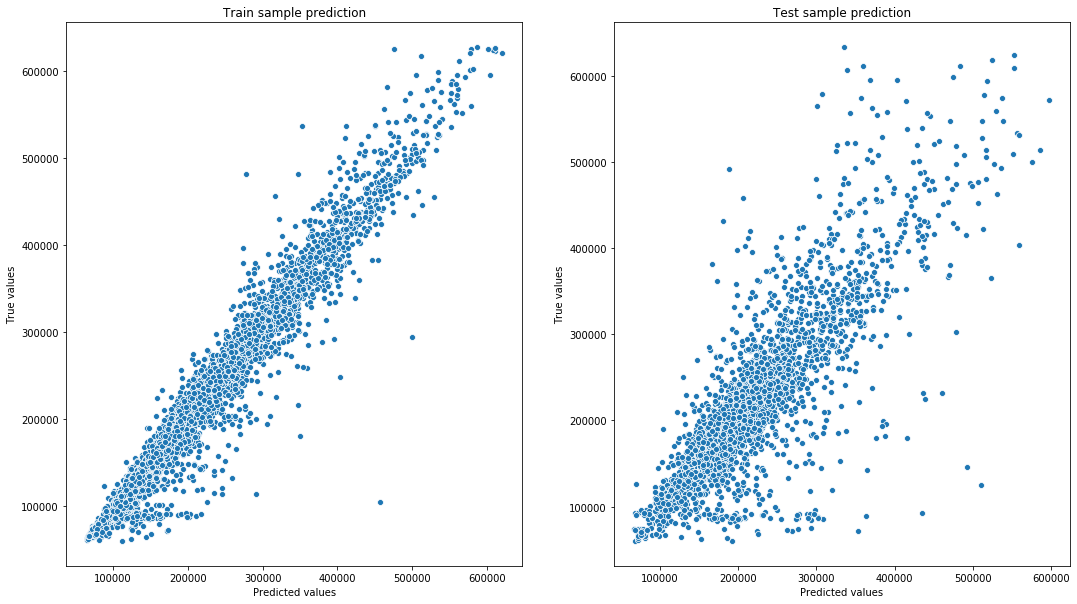

In [54]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [55]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
19,MedPriceByDistrict,0.636974
3,Square,0.112222
12,Social_3,0.025713
4,LifeSquare,0.024612
8,HouseYear,0.024442
0,Id,0.023638
5,KitchenSquare,0.020318
7,HouseFloor,0.019476
9,Ecology_1,0.018871
11,Social_2,0.015656


In [56]:
cv_score = cross_val_score(rf_model, X, y, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.72869597, 0.69763212, 0.71943766])

А теперь обработаем test датасет

In [57]:
service_square_median_test = (test.loc[test['LifeSquare'].notnull(), 'Square'] -\
                   test.loc[test['LifeSquare'].notnull(), 'LifeSquare'] -\
                   test.loc[test['LifeSquare'].notnull(), 'KitchenSquare']).median()

test.loc[((test['LifeSquare'] > test['LifeSquare'].quantile(.99)) |
      (test['LifeSquare'] < test['LifeSquare'].quantile(.01))), 'LifeSquare'] = test['LifeSquare'].median()
test.loc[((test['KitchenSquare'] > test['KitchenSquare'].quantile(.99)) |
      (test['KitchenSquare'] < test['KitchenSquare'].quantile(.01))), 'KitchenSquare'] = test['KitchenSquare'].median()

test.loc[(test['LifeSquare'] == 0), 'LifeSquare' ] = test['LifeSquare'].median()
test.loc[(test['KitchenSquare'] == 0), 'KitchenSquare'] = test['KitchenSquare'].median()

test.loc[test['LifeSquare'].isnull(), 'LifeSquare'] = test['LifeSquare'].median()

test.loc[((test['LifeSquare'] + test['KitchenSquare'])> test['Square']), 'Square'] = \
test['LifeSquare'] + \
test['KitchenSquare'] + service_square_median

test['Floor_update'] = test['Floor'] 
test.loc[test['Floor'] > test['HouseFloor'], 'Floor'] = test['HouseFloor']
test.loc[test['Floor_update'] > test['HouseFloor'], 'HouseFloor'] = test['Floor_update']

test['Ecology_2_bin'] = test['Ecology_2'].replace({'A':0, 'B':1})
test['Ecology_3_bin'] = test['Ecology_3'].replace({'A':0, 'B':1})
test['Shops_2_bin'] = test['Shops_2'].replace({'A':0, 'B':1})

In [73]:
Z = test[features]
Z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  5000 non-null   int64  
 1   DistrictId          5000 non-null   int64  
 2   Rooms               5000 non-null   float64
 3   Square              5000 non-null   float64
 4   LifeSquare          5000 non-null   float64
 5   KitchenSquare       5000 non-null   float64
 6   Floor               5000 non-null   float64
 7   HouseFloor          5000 non-null   float64
 8   HouseYear           5000 non-null   int64  
 9   Ecology_1           5000 non-null   float64
 10  Social_1            5000 non-null   int64  
 11  Social_2            5000 non-null   int64  
 12  Social_3            5000 non-null   int64  
 13  Helthcare_2         5000 non-null   int64  
 14  Shops_1             5000 non-null   int64  
 15  Floor_update        5000 non-null   int64  
 16  Ecolog

In [76]:
test['Price'] = rf_model.predict(Z)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  5000 non-null   int64  
 1   DistrictId          5000 non-null   int64  
 2   Rooms               5000 non-null   float64
 3   Square              5000 non-null   float64
 4   LifeSquare          5000 non-null   float64
 5   KitchenSquare       5000 non-null   float64
 6   Floor               5000 non-null   float64
 7   HouseFloor          5000 non-null   float64
 8   HouseYear           5000 non-null   int64  
 9   Ecology_1           5000 non-null   float64
 10  Ecology_2           5000 non-null   object 
 11  Ecology_3           5000 non-null   object 
 12  Social_1            5000 non-null   int64  
 13  Social_2            5000 non-null   int64  
 14  Social_3            5000 non-null   int64  
 15  Healthcare_1        2623 non-null   float64
 16  Helthc

In [79]:
ouput_features = ['Id', 'Price']
test_output = test[ouput_features]

In [80]:
test_output.to_csv('kalinichenko_diploma_prediction.csv', index=False)